In [7]:
%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Position Control Z axis Update 

<ipython-input-1-d3d4fc1039d6>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dd_pose_dt = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, g])) # acceleration


[0. 0. 0.]
[0.      0.      0.30155]
[0.         0.         0.88438298]
[0.         0.         1.71438301]
[0.         0.         2.74551374]
[0.         0.         3.92231759]
[0.        0.        5.1828514]
[0.         0.         6.46190379]
[0.         0.         7.69432823]
[0.         0.         8.81832204]
[0.         0.         9.77848712]
[ 0.          0.         10.52852169]
[ 0.          0.         11.03341304]
[ 0.          0.         11.27102847]
[ 0.          0.         11.23303358]
[ 0.          0.         10.92510187]
[ 0.          0.         10.36641579]
[0.         0.         9.58849529]
[0.         0.         8.63342302]
[0.         0.         7.55156467]
[0.         0.         6.39890702]
[0.         0.         5.23415349]
[0.         0.         4.11572708]
[0.         0.         3.09883306]
[0.         0.         2.23272841]
[0.         0.         1.55833226]
[0.         0.         1.10629254]
[0.         0.         0.89559919]
[0.        0.        0.9328054]
[0.   

[0.         0.         4.88401853]
[0.         0.         4.92005261]
[0.         0.         4.96012171]
[0.         0.         5.00214142]
[0.         0.         5.04396093]
[0.         0.         5.08347229]
[0.        0.        5.1187159]
[0.        0.        5.1479769]
[0.         0.         5.16986784]
[0.         0.         5.18339347]
[0.         0.         5.18799496]
[0.         0.         5.18357133]
[0.         0.         5.17047761]
[0.     0.     5.1495]
[0.         0.         5.12180973]
[0.         0.         5.08889821]
[0.         0.         5.05249712]
[0.         0.         5.01448749]
[0.         0.         4.97680277]
[0.         0.         4.94133069]
[0.         0.         4.90981885]
[0.         0.         4.88378894]
[0.         0.         4.86446351]
[0.         0.         4.85270899]
[0.         0.         4.84899747]
[0.         0.         4.85338896]
[0.         0.         4.86553462]
[0.         0.         4.88470053]
[0.         0.         4.90981056]
[0.

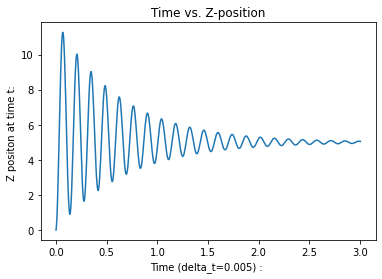

In [1]:
import time
import numpy as np


z_positions = []
time_intervals = []
delta_t = .005 # in seconds 
g = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, -9.81]))
t = 0
run_time  = 3

# initial values 
pose = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, 0.0]))
d_pose_dt = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, 0.0])) # velocity 
dd_pose_dt = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, g])) # acceleration

# target
target = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, 5.0]))  # 5 meters 
accumulated_pos_error = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, 0.0]))

# control parameters

# best so far 
kp = 10
kd = 5
ki = .1

# Experimented with these values : 
# kp = kd = ki = 1 does not converge at all !
# kp = 10 and kd = 1 and ki = 0 converges slowly # 7 seconds 


# iterate through this while loop until desired 
# target velocity is reached 
z_positions.append(pose[2])
time_intervals.append((t))
while t < run_time :
    # simulating the object hitting / going back to the ground 
    if pose[2] <= 0 :
        pose[2] = 0
        d_pose_dt = 0
        
        
    print(pose)
   
    # error from desired location in z direction
    accumulated_pos_error += (target - pose)
    
    # PD control for acceleration in z - direction : 
    dd_pose_dt = kp * (target - pose) + kd * (-d_pose_dt) + ki * (accumulated_pos_error)
    u_input = dd_pose_dt + -g
    
    # update predicted current z-direction velocity of object (initially 0) : 
    d_pose_dt = d_pose_dt + u_input * delta_t
    
    # update current position : 
    pose = pose + d_pose_dt  
     
    
    t = t + delta_t
    z_positions.append(pose[2])
    time_intervals.append((t))
    # time.sleep(delta_t) # in seconds
    

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# print("Time (delta_t=0.5) : ", time_intervals)
# print("Z positon at time t: ",z_positions)

plt.title('Time vs. Z-position')
plt.xlabel('Time (delta_t=0.005) : ')
plt.ylabel('Z positon at time t: ')

plt.plot(time_intervals, z_positions)

plt.show()

In [2]:
# g = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, -9.81]))
# print(g.shape)

In [3]:
!pip install JSAnimation

You should consider upgrading via the 'c:\users\rbd218\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


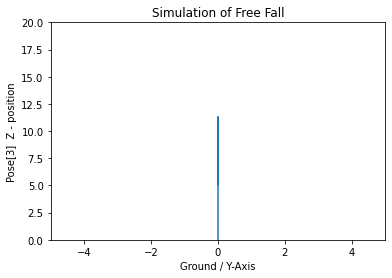

In [5]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML

fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(0, 20)
line, = ax.plot(0, 0)

x_data = []
y_data = []
def animation_frame(i):
	x_data.append(0)
	y_data.append(z_positions[i])

	line.set_xdata(x_data)
	line.set_ydata(y_data)
	return line,


# interval is time delay (ie every delta_t miliseconds ) delta_t = .005 but need to pass 5 for 5 miliseconds 
animation = FuncAnimation(fig, func=animation_frame, frames=np.arange(0, len(time_intervals), 1), interval=5)
plt.title('Simulation of Free Fall')
plt.xlabel('Ground / Y-Axis')
plt.ylabel('Pose[3]  Z - position')

HTML(animation.to_jshtml())
   